In [4]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# インプットデータを最低限整理
df = pd.read_csv("onlinenewspopularity.csv")
# df = data.drop(columns='url')
# 各カラム名の先頭にスペースがあったため、削除
tmp = []
for i in range(len(df.columns)): 
    tmp.append(df.columns[i].replace(" ", ""))
df.columns = tmp

df = df.drop(columns=['url'])

# 目的変数を対数変換
target = df['shares']
target_log = np.log(target)

# 対数変換したtargetに、列名をつける
target_log = pd.Series(target_log, name='shares_log')
# データフレームに追加
df = pd.concat([df, target_log], axis=1)


In [8]:
# ダミー変数の効果を可視化する
def visual_dammy(df, ikichi, x, y): 
    pop = df[df[y] >= ikichi]
    unpop = df[df[y] < ikichi]
    pop_day = pop[x].sum().values
    unpop_day = unpop[x].sum().values
    
    # 図を作成（サイズを指定）
    fig = plt.figure(figsize=(26, 10))
    
    # タイトルを設定
    plt.title('Popular of Unpopular')
    
    # 棒グラフを作成
    plt.bar(np.arange(len(x)), pop_day, width=0.3, color='blue', label='Popular')
    # 2つの棒グラフを並べるため、0.3ずらす
    plt.bar(np.arange(len(x)) - 0.3, unpop_day, width=0.3, color='orange', label='Unpopular')
    
    plt.xticks(np.arange(len(x)), x)
    plt.xlabel('Dammy')
    plt.ylabel('Count')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

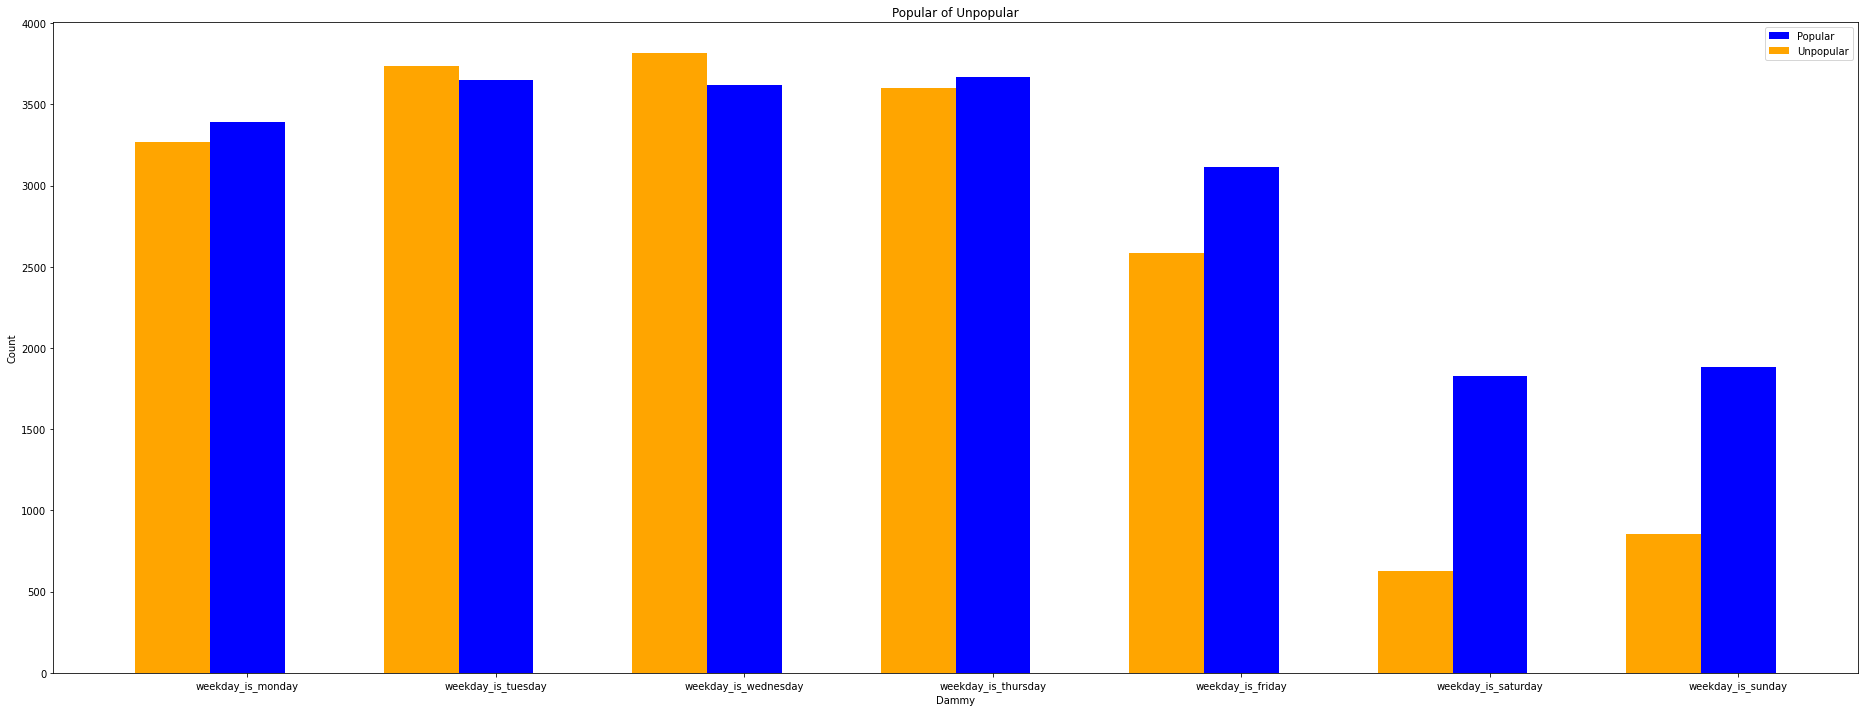

In [9]:
# 曜日を可視化
x = df.columns.values[30:37]
visual_dammy(df, 1400, x, 'shares')

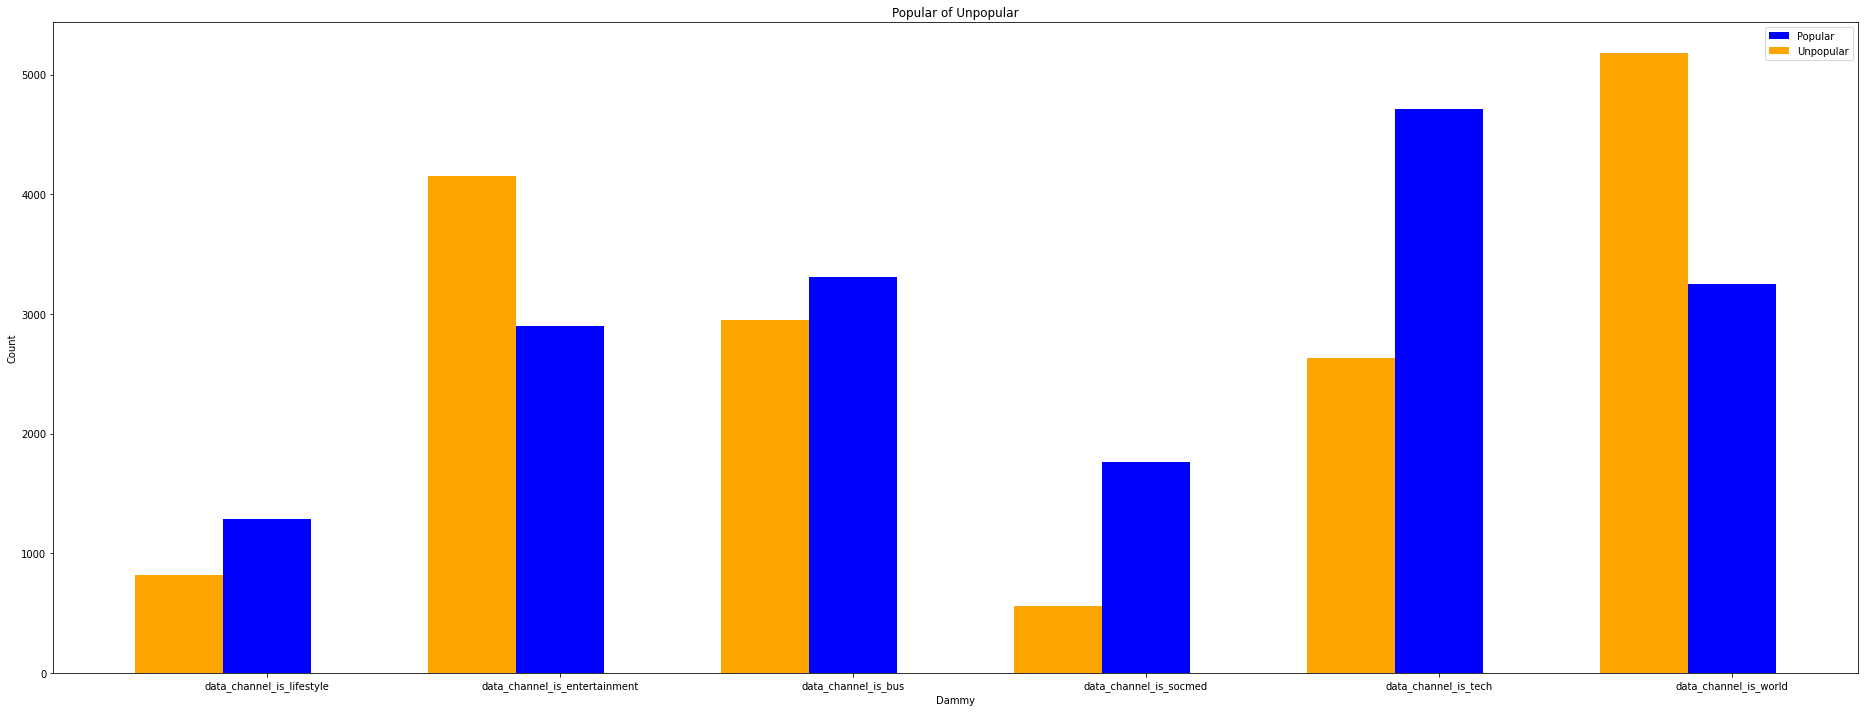

In [11]:
# チャンネルを可視化
x = df.columns.values[12:18]
visual_dammy(df, 1400, x, 'shares')

In [13]:
# sharesをダミー変数にする
median = df['shares'].median()
df['shares'] = df['shares'].apply(lambda x: 0 if x < median else 1)

In [52]:
# sharesが1400より大きいかどうかで分ける
tmp = []
# sharesが1400よりも大きい場合、1をtmpにappendする
for i in range(len(df)): 
    if df['shares'][i] > 1400: 
        tmp.append(1)
    else: 
        tmp.append(0)
# 0, 1が入ったリストを、列名をつけてpandas.Seriesにする
shares1400 = pd.Series(tmp, name='shares1400')
# concatで、dfに結合
df = pd.concat([df, shares1400], axis=1)

In [32]:
# xとyの散布図の関数
def scatter_plot_df(X, Y, data=df): 
    plt.scatter(x=data[X], y=data[Y])

    plt.title('Scatter Plot of {} vs {}'.format(X, Y))
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.grid(True)
    plt.show()

In [5]:
f = open("OnlineNewsPopularity.names", "rb")
news_names = f.read()
f.close()
print(news_names)

b"1. Title: Online News Popularity\n\n2. Source Information\n    -- Creators: Kelwin Fernandes (kafc \xe2\x80\x98@\xe2\x80\x99 inesctec.pt, kelwinfc \xe2\x80\x99@\xe2\x80\x99 gmail.com),\n                 Pedro Vinagre (pedro.vinagre.sousa \xe2\x80\x99@\xe2\x80\x99 gmail.com) and\n                 Pedro Sernadela\n   -- Donor: Kelwin Fernandes (kafc \xe2\x80\x99@\xe2\x80\x99 inesctec.pt, kelwinfc '@' gmail.com)\n   -- Date: May, 2015\n\n3. Past Usage:\n    1. K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision\n       Support System for Predicting the Popularity of Online News. Proceedings\n       of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,\n       September, Coimbra, Portugal.\n\n       -- Results: \n          -- Binary classification as popular vs unpopular using a decision\n             threshold of 1400 social interactions.\n          -- Experiments with different models: Random Forest (best model),\n             Adaboost, SVM, KNN